In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Sans'

# Load the dataset
emdat = pd.read_csv('emdat.csv')
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [18]:
# 災害タイプ別死亡者の合計を計算し、ランキングを作成
death_ranking = emdat.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
print("災害タイプ別死亡者ランキングトップ10:")
#上位10件を表示
print(death_ranking.head(10))

災害タイプ別死亡者ランキングトップ10:
Disaster Type
Drought                11734272.0
Epidemic                9623111.0
Flood                   7016630.0
Earthquake              2409975.0
Storm                   1421623.0
Extreme temperature      306324.0
Volcanic activity         86945.0
Mass movement (wet)       69393.0
Wildfire                   5349.0
Mass movement (dry)        4502.0
Name: Total Deaths, dtype: float64


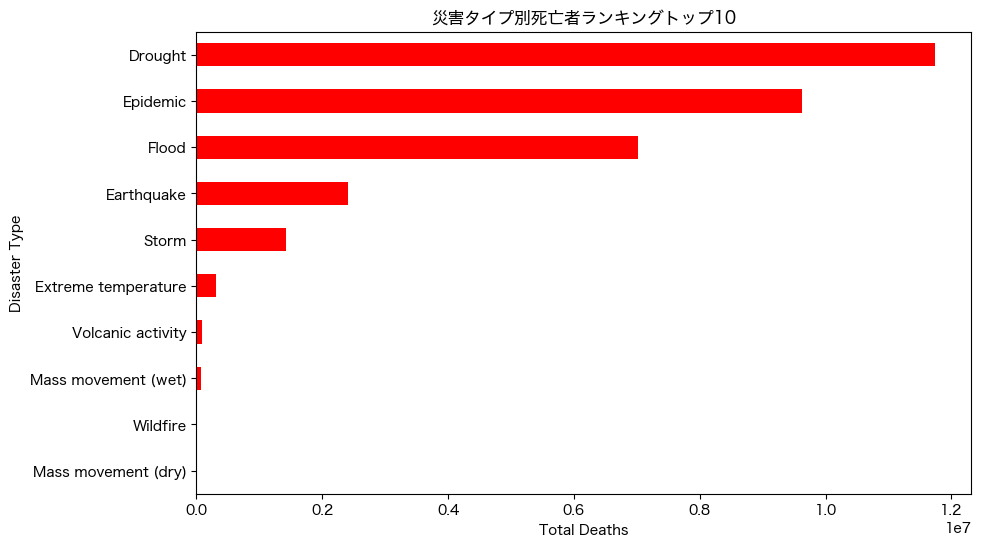

In [19]:
# 可視化: 災害タイプ別死亡者ランキングトップ10の棒グラフ
top_10_deaths = death_ranking.head(10)
# Plotting
plt.figure(figsize=(10, 6))
#カラーとタイトルを追加
top_10_deaths.plot(kind='barh', color='red')
#ラベルとタイトルを追加
plt.xlabel('Total Deaths')
plt.title('災害タイプ別死亡者ランキングトップ10')
plt.gca().invert_yaxis()  # Highest first
plt.show()


Drought 発生回数トップ10（国）:
Country
China                       42
Brazil                      22
United States of America    20
Ethiopia                    18
Niger                       17
Kenya                       17
Somalia                     17
Mozambique                  16
India                       16
Burkina Faso                15
Name: count, dtype: int64


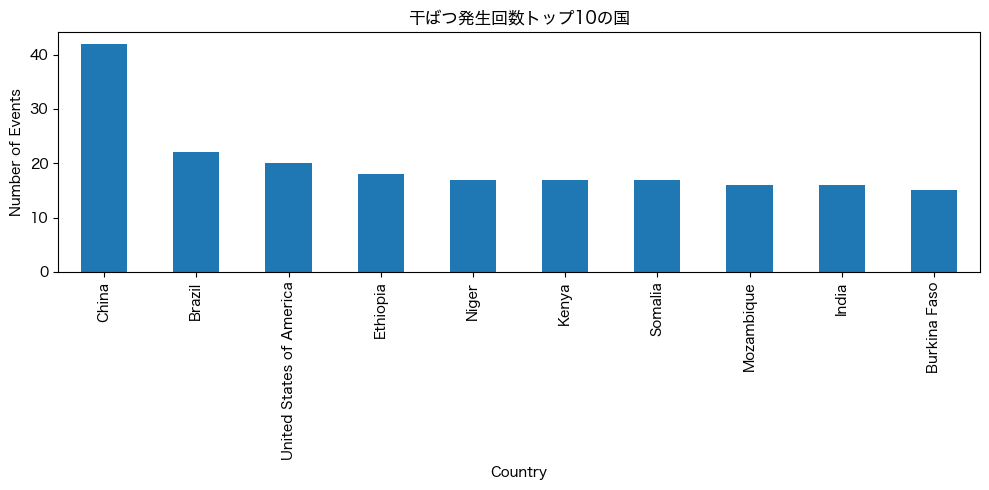


Drought による総死亡数トップ10（国）:
Country
India           4250320.0
China           3503534.0
Bangladesh      1900018.0
Soviet Union    1200000.0
Ethiopia         402367.0
Sudan            150000.0
Mozambique       100068.0
Niger             85000.0
Cabo Verde        85000.0
Somalia           39673.0
Name: Total Deaths, dtype: float64


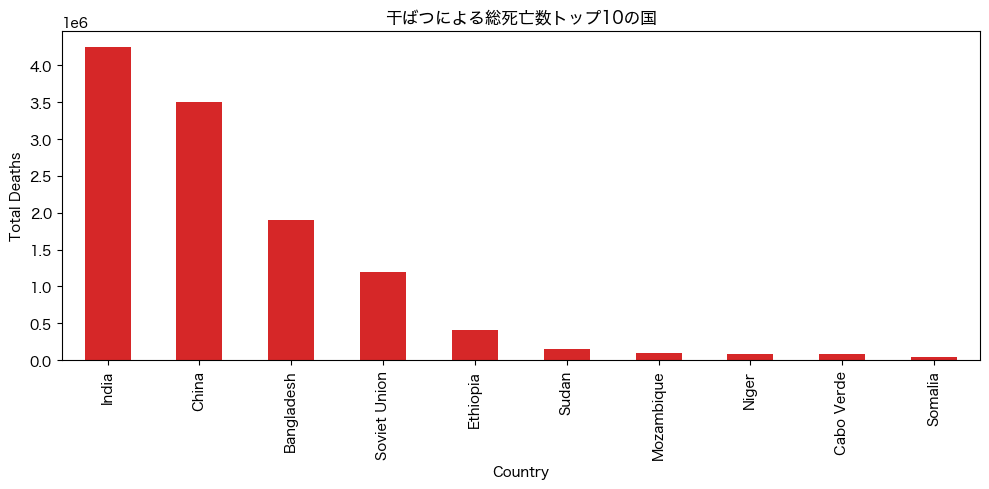

In [21]:
# Drought に関する国別トップ10ランキング（発生回数 と 総死亡数）
# Disaster Type に 'Drought' を含む行を抽出（大文字小文字を区別しない）
drought_df = emdat[emdat['Disaster Type'].str.contains('Drought', case=False, na=False)]

if drought_df.empty:
    print('データセットに Drought のイベントが見つかりません。Disaster Type 列の値を確認してください。')
else:
    # トップ10（発生回数）
    top_by_events = drought_df['Country'].value_counts().head(10)
    print('\nDrought 発生回数トップ10（国）:')
    print(top_by_events)
    plt.figure(figsize=(10, 5))
    top_by_events.plot(kind='bar', color='C0')
    plt.ylabel('Number of Events')
    plt.title('干ばつ発生回数トップ10の国')
    plt.tight_layout()
    plt.show()

    # トップ10（総死亡数）
    # Total Deaths 列が存在しない、または数値でない場合に備えて例外処理を用意
    try:
        top_by_deaths = drought_df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(10)
    except Exception as e:
        print('総死亡数の集計に失敗しました:', e)
    else:
        print('\nDrought による総死亡数トップ10（国）:')
        print(top_by_deaths)
        plt.figure(figsize=(10, 5))
        top_by_deaths.plot(kind='bar', color='C3')
        plt.ylabel('Total Deaths')
        plt.title('干ばつによる総死亡数トップ10の国')
        plt.tight_layout()
        plt.show()

分析
まず災害タイプ別に死亡者数をランキングしたところ、drought(干ばつ)が一番多いことがわかった。発生回数と死亡者数に相関があるか気になったので、干ばつのそれぞれのグラフを作成したところ、発生回数が多かったのは圧倒的に中国であったが、死亡者数が一番多かったのはインドであった。インドは発生回数が9位の国であるので、発生回数と死亡者数に相関はないと考えられる。

感想
今回も棒グラフによる分析を行ったが、地図上に印を付けたりもしていきたいと思った。それらの方法は自らで調べて作業して行きたい。